# Prediction using Decision Tree Algorithm

### PROBLEM STATEMENT : Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

### Importing data sets

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data

iris_data = pd.DataFrame(X, columns = iris.feature_names)

y = iris.target

In [3]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


### Spliting dataset into train and test sets

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

### Defining the Decision Tree Algorithm

In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

### Visualizing the Decision tree

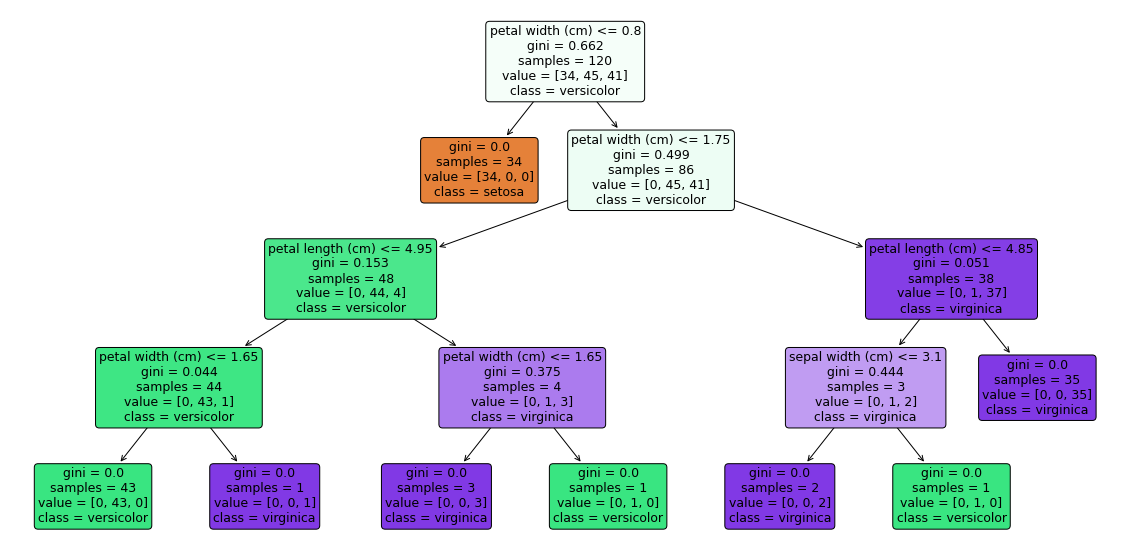

In [8]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize = (20,10))
plot_tree(classifier, feature_names = iris.feature_names, class_names=iris.target_names, filled = True, rounded = True)
plt.show()

fig.savefig('DecisionTree.png')

### Making Predictions

In [9]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

### Evaluating the Model

In [10]:
y_test = iris.target_names[y_test]
y_pred = iris.target_names[y_pred]

df = pd.DataFrame(np.column_stack((X_test, y_test, y_pred)), columns = iris.feature_names + ['Actual Class', 'Predicted Class'])

def highlight(s, column):
    if s['Actual Class'] == s['Predicted Class']:
        return ['background-color: lightgreen']*6
    else:
        return ['background-color: salmon']*6
    
df.style.apply(highlight, column=['Actual Class', 'Predicted Class'], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Actual Class,Predicted Class
0,6.4,2.8,5.6,2.1,virginica,virginica
1,5.7,3.8,1.7,0.3,setosa,setosa
2,7.4,2.8,6.1,1.9,virginica,virginica
3,7.6,3.0,6.6,2.1,virginica,virginica
4,7.3,2.9,6.3,1.8,virginica,virginica
5,6.0,2.9,4.5,1.5,versicolor,versicolor
6,6.0,2.7,5.1,1.6,versicolor,virginica
7,5.8,4.0,1.2,0.2,setosa,setosa
8,5.4,3.9,1.7,0.4,setosa,setosa
9,6.3,2.8,5.1,1.5,virginica,virginica


In [11]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9666666666666667


### Thus, we can say that our classification rate is 96.67%.